# 9. Potential Evapotranspiration from CMIP6 climate projections (NetCDF)
*M. Vremec, December 2022, University of Graz*


What is done:

- load the data from Copernicus
- estimate potential evapotranspiration
- plot

Data source: 
* Copernicus - https://cds.climate.copernicus.eu/  (SSP1-1.9, EC-Earth3 (Europe))
* [CMIP6 GMD special issue articles](https://gmd.copernicus.org/articles/special_issue590.html)
* [Terms of using CMIP6 data](https://pcmdi.llnl.gov/CMIP6/TermsOfUse/TermsOfUse6-2.html)

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import pyet

In [2]:
# Import data
xr_ds = xr.open_dataset("data//example_9//tas_day_EC-Earth3_ssp119_r4i1p1f1_gr_21000601-21000630_v20200425.nc", 
            engine="netcdf4")

In [3]:
# Define mean temperature and latitude
tmean = xr_ds["tas"] - 273
lat = xr_ds.lat * np.pi/180

In [4]:
# Compute PET with Oudin
pet_oudin = pyet.oudin(tmean, lat=lat)

C:\Users\Matevz\anaconda3\lib\site-packages\xarray\core\computation.py:733: RuntimeWarning: invalid value encountered in arccos
  result_data = func(*input_data)


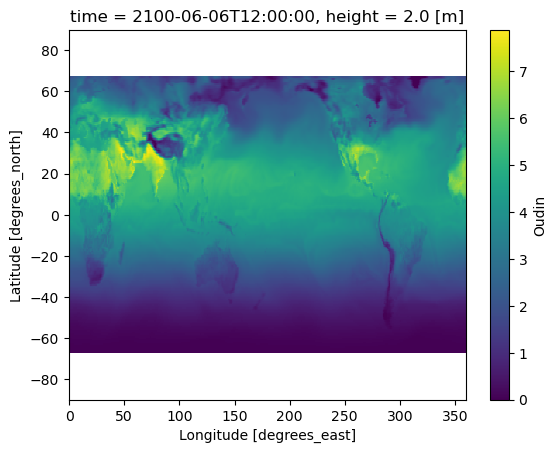

In [5]:
pet_oudin.sel(time="2100-6-6").plot()

## Acknowledgement

We acknowledge the World Climate Research Programme, which, through its Working Group on Coupled Modelling, coordinated and promoted CMIP6. We thank the climate modeling groups for producing and making available their model output, the Earth System Grid Federation (ESGF) for archiving the data and providing access, and the multiple funding agencies who support CMIP6 and ESGF.